# Neural Network (Multilayered Perceptron) From Scratch


In [1]:
import numpy as np
np.random.seed(69420)

## Neuron Representation
```
[ A    B <- Input Neurons
 [w00 w01] O1
 [w10 w11] O2
 [w20 w21] O3   <- Outputs to next layer
]
                 
```

In [2]:
W1 = np.array([
    [0.1,0.2], 
    [0.2,0.1],
    [0.3,0.5]
])

bias1 = np.array([0.2,0.1,0.4])

### XOR function:

In [3]:
X = np.array([
    [0,0],
    [0,1],
    [1,0],
    [1,1]
])

t = np.array([
    [0],
    [1],
    [1],
    [0]
])

In [4]:
def neuron_sum(x,W,b):
    return W@x +b

In [5]:
for x in X:
    print(neuron_sum(x,W1,bias1))

[0.2 0.1 0.4]
[0.4 0.2 0.9]
[0.3 0.3 0.7]
[0.5 0.4 1.2]


so our formula to compute the activation of a neuron is
$$
y_i = g(\mathbf W \cdot x + bias)
$$

## Neural Network Representation

NN(MLP) = $[(W^1,bias^1),...,(W^l,bias^l),...(W^L,bias^L)]$, where $l = 1,\dots,L$.

let's add two more layers,


arch: (3x2)-(4x3)-(1x4)

In [6]:
W2 = np.array([
    [0.1,0.2,0.1],
    [0.1,0.4,0.2],
    [0.2,0.5,0.4],
    [0.3,0.1,0.3]
])

bias2  = np.array([0.2,0.3,0.5,0.3])

In [7]:
W3 = np.array([
    [0.1,0.5,0.1,0.4],
])

bias3  = np.array([0.1])

In [8]:
NN = [(W1,bias1),(W2,bias2),(W3,bias3)]

## Forward Phase

For the first hidden layer:
$$
z^1 = x \cdot \mathbf W^1 + bias^1 \\
y^1 = g(z^1)
$$
For subsequent hidden layers:
$$
z^l = y^{l-1} \cdot \mathbf W^l + bias^l \\
y^l = g(z^l)
$$
For the output layer:
$$
z^L =  y^{L-1} \cdot W^L + bias^L \\
y^L = g(z^L)
$$

for activation function lets use sigmoid($\sigma$)

In [9]:
beta = 1 #global

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z*beta))

In [11]:
A = [X[0]]
for Weight,b in NN:
    print(A[-1],end = "\nto\n")
    A.append(sigmoid(neuron_sum(A[-1],Weight,b)))
    
print(A[-1])

[0 0]
to
[0.549834   0.52497919 0.59868766]
to
[0.60344688 0.66478969 0.75248902 0.66753438]
to
[0.69741158]


## Error Calculation
MSE,
$$
E = \frac 12 \sum_{i=1}^N (y^L_i - y_i)^2
$$

Using Mean Squared Error, lets compute the error between the predicted output and the desired output.


In [12]:
def MSE(t,y):
    return np.sum((y-t)**2)/2

In [13]:
MSE(t[0],A[-1])

0.24319145273888504

## Backward Phase (Error back propagation)

For the output layer:
$$
δ^L = (y^L - y) * g'(z^L)
$$
For the hidden layers:
$$
δ^l = g'(z^l) * W^{l+1} \cdot δ^{i+1}
$$
where $δ^l$ is the error of neuron in the l-th layer, and g'(z) is the derivative of the activation function.


The partial derivative of the error with respect to a weight is:
$$
\frac {\partial E}{\partial W^l} = y^{l-1} * δ^l
$$
The partial derivative of the error with respect to a bias is:
$$
\frac {\partial E}{\partial b^l} = δ^l
$$

In [14]:
def sigmoid_d(y): # here instead of the input z^l we directly given y^l because 𝜎' = 𝜎(z) * (1 - 𝜎(z))
    return beta*y * (1 - y)

In [15]:
delta_o = (A[-1] - t[0]) * sigmoid_d(A[-1])
delta_o

array([0.14717384])

In [16]:
delta_h = (W3.T @ delta_o) * sigmoid_d(A[-2])
delta_h

array([0.00352185, 0.01639843, 0.0027411 , 0.01306505])

In [17]:
delta_i = (W2.T @ delta_h) * sigmoid_d(A[-3])
delta_i

array([0.0015989 , 0.002479  , 0.00207773])

In [18]:
dE_dW3 = A[-2].reshape(-1,1) * delta_o
dE_dW3

array([[0.08881159],
       [0.09783965],
       [0.1107467 ],
       [0.0982436 ]])

In [19]:
W3 - dE_dW3.T

array([[ 0.01118841,  0.40216035, -0.0107467 ,  0.3017564 ]])

In [20]:
A[-3],A[-3].reshape(-1,1)

(array([0.549834  , 0.52497919, 0.59868766]),
 array([[0.549834  ],
        [0.52497919],
        [0.59868766]]))

In [21]:
dE_dW2 = A[-3].reshape(-1,1) * delta_h
dE_dW2

array([[0.00193643, 0.00901641, 0.00150715, 0.00718361],
       [0.0018489 , 0.00860883, 0.00143902, 0.00685888],
       [0.00210849, 0.00981754, 0.00164106, 0.00782188]])

In [22]:
dE_dW1 = A[-4].reshape(-1,1) * delta_i
dE_dW1

array([[0., 0., 0.],
       [0., 0., 0.]])

## Summing all up!!!

In [23]:
import matplotlib.pyplot as plt

In [24]:
# NN Initializer
def init_network(arch):
    return [ (
        np.random.randn(arch[i],arch[i-1]) * np.sqrt(1 / arch[i-1]),
        np.random.rand(arch[i])
    ) for i in range(1,len(arch))]

In [25]:
# Feed Forward the input
def forward(x,NN):
    A = [x]
    for w,b in NN:
        A.append(sigmoid(neuron_sum(A[-1],w,b)))
    return A

In [26]:
# Back Propogate the error
def backward(A,NN,t):
    L = len(NN)
    deltas = [None]* L
    dE_dW = [None] * L
    L-=1
    
    for i in range(L,-1,-1):
        if i != L:deltas[i] = (NN[i+1][0].T @ deltas[i+1]) * sigmoid_d(A[i+1])
        else: deltas[i] = (A[i+1] - t) * sigmoid_d(A[i+1])
        
        dE_dW[i] = (A[i].reshape(-1,1) * deltas[i]).T
    return deltas, dE_dW

In [27]:
# Weight update
def update_weights(NN,deltas,dE_dw,eta):
    for i in range(len(NN)):
        W,b = NN[i]
        W -= eta * dE_dw[i]
        b -= eta * deltas[i]

In [28]:
# predict function 
def predict(X,NN):
    return np.array([np.round(forward(x,NN)[-1]) for x in X])

### Network Training using SGD algorithm

In [29]:
def train(X,y,NN,epoch=1000,eta=0.01,errorcal=10):
    mse_l = []
    record = True
    mse=0
    for i in range(1,epoch+1):
        if i%errorcal == 0: 
            record = True
            mse=0
            
        for x,t in zip(X,y):
            A = forward(x,NN)
            d,gra = backward(A,NN,t)
            update_weights(NN,d,gra,eta)
            if record: mse += MSE(A[-1],t)
        if record:
            mse_l.append(mse)
            record = False

    fig = plt.figure(figsize=(5,5))
    plt.plot(range(len(mse_l)),mse_l)
    plt.xlabel(f"Epoch*{errorcal}")
    plt.ylabel("MSE")
    plt.plot()

## Model XOR function 

In [30]:
XOR = init_network([2,3,1])

predictions before training the network

In [31]:
predict(X,XOR)

array([[1.],
       [1.],
       [1.],
       [1.]])

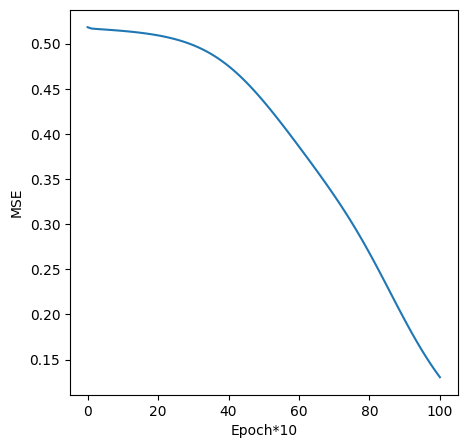

In [32]:
train(X,t,XOR,eta=0.25,errorcal=10,epoch=1000)

In [33]:
predict(X,XOR)

array([[0.],
       [1.],
       [1.],
       [0.]])

## Model breast cancer dataset

In [34]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
bc = load_breast_cancer()

In [35]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(bc.data,bc.target,test_size=0.3,shuffle=True)

In [36]:
X_test.shape

(171, 30)

In [37]:
bc_NN = init_network([30,10,4,1])

In [38]:
beta = 0.3 # set global constant

/tmp/ipykernel_9521/854337207.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z*beta))


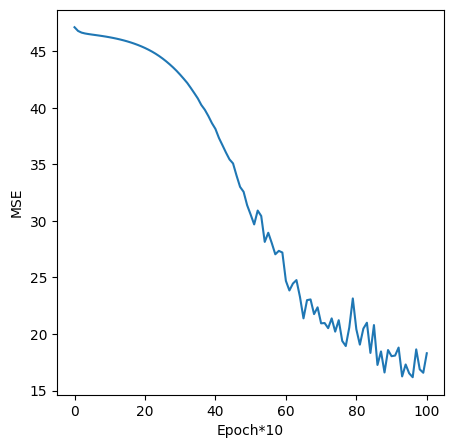

In [39]:
train(X_train,y_train,bc_NN,eta=0.01,epoch=1000,errorcal=10)

In [40]:
y_pred = predict(X_test,bc_NN)
print(f"Model Accuracy on Test set: {accuracy_score(y_test,y_pred)}")
print(f"Model Accuracy on Train set: {accuracy_score(y_train,predict(X_train,bc_NN))}")

Model Accuracy on Test set: 0.9298245614035088
Model Accuracy on Train set: 0.9045226130653267


/tmp/ipykernel_9521/854337207.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z*beta))
/tmp/ipykernel_9521/854337207.py:2: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z*beta))


# Full Implementation of Neural Network with Momentum in Weight Updating Step

In this simple implementation of Multilayered Perceptron, the `train` function train on batch size of 1, which corresponds to online or incremental learning. The `train_on_batch` function, on the other hand, considers the given input as a batch and updates the model parameters accordingly.

So, there is no implementation of SGD using mini-batches in this code, as it is not necessary for this small project. 

However, if you wish to implement SGD with mini-batches, a straightforward approach would be to create a simple function that divides the dataset into smaller batches, randomly selects one batch, and applies `train_on_batch` with `epoch=1` for a $N$ epochs. This approach can be more computationally efficient when working with larger datasets, as it allows the model to update its parameters using smaller subsets of the data at a time.

Pseudo code SGD with mini-batches:

```py
Function train(X, y, NN, batch_size, num_epochs):
    mini_batches = make_mini_batches(X, y, batch_size)
    losses = []
    for epoch in range(num_epochs):
        X_batch, y_batch = random_choice(mini_batches)
        losses += NN.train_on_batch(X_batch, y_batch, epoch=1)
            
    return losses
```
## Momentum $\alpha$ 
Momentum is a concept in optimization algorithms that governs how much weight is given to previous weight updates when computing the current update. In the context of SGD, momentum can be thought of as a ball rolling down a hill. Without momentum, the ball may get stuck in a local minimum on its way to the steepest point. However, by giving the ball a little momentum, it can more easily escape the local minimum and continue rolling towards the global minimum.

At first the $\Delta W^l$ is set to 0,

Then, the current updates calculated and stored in $\Delta W^l = \eta * \frac {\partial E}{\partial W^l} + \alpha * \Delta W^l$ 

Finally the Network weights updated by, $W^l =  W^l - \Delta W^l$.

where $l = 1,\dots,L$ (number of layers), and the same process is used for updating the biases $\Delta b^l$.

**File**: `nn.py`
- **Classes**: `NeuralNetwork`,`sigmoid`,`linear` &`relu`.

- **Functions**: `MSE`&`neuron_sum`

In [41]:
from nn import NeuralNetwork
from sklearn.datasets import load_iris

## Lets model the Iris dataset with our NeuralNetwork

In [42]:
iris = load_iris()

In [43]:
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.5,shuffle=True)

In [44]:
X_test.shape

(75, 4)

In [45]:
iris_model = NeuralNetwork([4,3,1],["sigmoid","linear"],eta=0.1,momentum=0.3)

In [46]:
mse_l = iris_model.train(X_train,y_train,epoch=100,errorcal=1)

[]

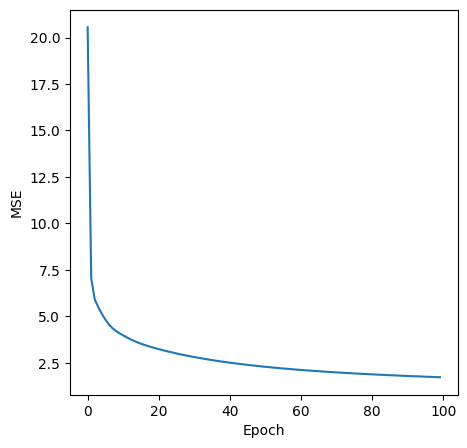

In [47]:
fig = plt.figure(figsize=(5,5))
plt.plot(range(len(mse_l)),mse_l)
plt.xlabel(f"Epoch")
plt.ylabel("MSE")
plt.plot()

In [48]:
y_preds = [np.round(y) for y in iris_model.predict(X_test)]
print(f"Accuracy of the model (Test set): {accuracy_score(y_test,y_preds)}")

Accuracy of the model (Test set): 0.96


In [49]:
y_preds = [np.round(y) for y in iris_model.predict(X_train)]
print(f"Accuracy of the model (Train set): {accuracy_score(y_train,y_preds)}")

Accuracy of the model (Train set): 0.9333333333333333
